In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def initialize_spins(L):
    return np.random.choice([-1, 1], size=(L, L))

In [3]:
def neighbors(L, x, y):
    neighbors = [(x, (y+1)%L), (x, (y-1)%L), ((x+1)%L, y), ((x-1)%L, y)]
    return neighbors

In [4]:
def wolff(spins, B):
    L = spins.shape[0]
    x, y = random.randint(0, L-1), random.randint(0, L-1)
    seed_spin = spins[x, y]

    cluster = {(x, y)}
    stack = [(x, y)]

    while stack:
        sx, sy = stack.pop()

        for nx, ny in neighbors(L, sx, sy):
            if (nx, ny) not in cluster and spins[nx, ny] == seed_spin:
                if random.random() < 1 - np.exp(-2 * B):
                    cluster.add((nx, ny))
                    stack.append((nx, ny))

    for (ix, iy) in cluster:
        spins[ix, iy] *= -1

    return spins

In [5]:
def simul(L, B):
    spins = initialize_spins(L)

    for i in range(10000):
        spins = wolff(spins, B)

    return abs(np.sum(spins))/L**2

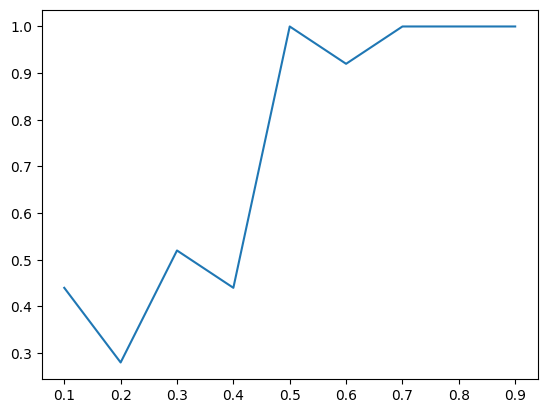

In [6]:
L = 5
B = np.arange(0.1,1.0,0.1)
spin_list = []

for b in B :
  spin_v = simul(L,b)
  spin_list.append(spin_v)

plt.plot(B,spin_list)
plt.show()